In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bokeh.plotting import figure, output_notebook,show, ColumnDataSource
from bokeh.layouts import widgetbox
from bokeh.models.widgets import DataTable, NumberFormatter, TableColumn
output_notebook()

from cross_validation import *
from proj1_helpers import *
from implementations import *
from helpers import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Loading BokehJS ...

# Cross-validation of the six baseline implementations

In [18]:
y, x, ids = load_csv_data('data/train.csv')
labels = np.array(np.genfromtxt('data/train.csv', delimiter=",", names=True).dtype.names[2:])

In [28]:
def cross_validation_visualization(lambds, mse_tr, mse_te, xlabel, ylabel, title, filename):
    """visualization the curves of mse_tr and mse_te."""
    fig = plt.figure()
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc=2)
    plt.grid(True)
    fig.savefig(filename, bbox_inches='tight')

# cross-validation for least squares with gradient descent

/Users/Hakim/Documents/ML_project/scripts/helpers.py:71: RuntimeWarning: invalid value encountered in less_equal
  res[res <= 0] = -1
/Users/Hakim/Documents/ML_project/scripts/helpers.py:72: RuntimeWarning: invalid value encountered in greater
  res[res > 0]  = 1


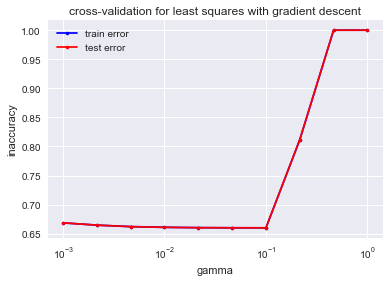

In [33]:
gammas = np.logspace(-3,0,10)
mse_tr = []
mse_te = []
y_scaled = (y+1)/2.0
for gamma in gammas:
    mse_tr_, mse_te_ = cross_validation(y_scaled, x, 10, least_squares_GD, accuracy, {'initial_w' : np.zeros(x.shape[1] + 1), 'max_iters':500, 'gamma':gamma})
    mse_tr.append(mse_tr_)
    mse_te.append(mse_te_)
cross_validation_visualization(gammas, mse_tr, mse_te, "gamma", "inaccuracy", "cross-validation for least squares with gradient descent","cross_validation_least_squares_GD.png")

# cross-validation for least squares with stochastic gradient descent

/Users/Hakim/Documents/ML_project/scripts/implementations.py:30: RuntimeWarning: invalid value encountered in subtract
  return w, compute_mse(y, tx, w)
/Users/Hakim/Documents/ML_project/scripts/helpers.py:71: RuntimeWarning: invalid value encountered in less_equal
  res[res <= 0] = -1
/Users/Hakim/Documents/ML_project/scripts/helpers.py:72: RuntimeWarning: invalid value encountered in greater
  res[res > 0]  = 1


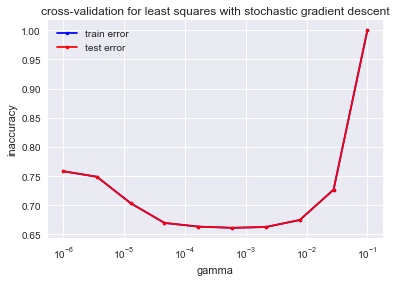

In [4]:
gammas = np.logspace(-6,-1,10)
mse_tr = []
mse_te = []
y_scaled = (y+1)/2.0
for gamma in gammas:
    mse_tr_, mse_te_ = cross_validation(y_scaled, x, 10, least_squares_SGD, accuracy, {'initial_w' : np.zeros(x.shape[1]  + 1), 'max_iters':10000, 'gamma':gamma})
    mse_tr.append(mse_tr_)
    mse_te.append(mse_te_)
cross_validation_visualization(gammas, mse_tr, mse_te, "gamma", "inaccuracy", "cross-validation for least squares with stochastic gradient descent", "cross_validation_least_squares_SGD.png")

# cross-validation for least squares with normal equation

In [22]:
rmse_tr_, rmse_te_ = cross_validation(y, x, 10, least_squares, accuracy, seed=5)
print(rmse_tr_, rmse_te_)

0.255052 0.255


# cross-validation for ridge regression

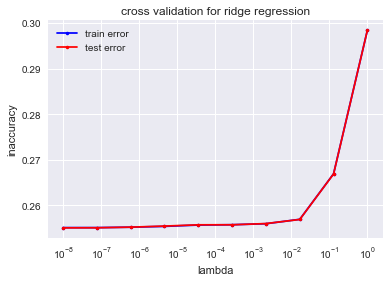

In [23]:
lambdas = np.logspace(-8,0,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te, "lambda", "inaccuracy", "cross validation for ridge regression", "cross_validation_ridge_regression.png")

# cross-validation for logistic regression

/Users/Hakim/Documents/ML_project/scripts/helpers.py:70: RuntimeWarning: divide by zero encountered in log
  else:


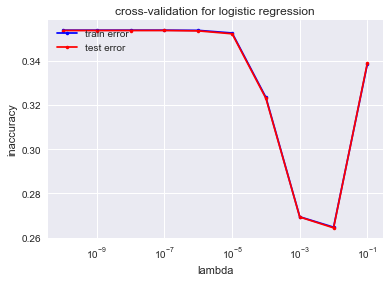

In [34]:
lambdas = np.logspace(-10,-1,10)
rmse_tr = []
rmse_te = []
y_scaled = (y+1)/2.0
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_scaled, x, 10, logistic_regression, accuracy, {'initial_w': np.zeros(x.shape[1] + 1), 'max_iters': 10000, 'gamma': lambda_}, {'is_sigmoid': True})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te, "lambda", "inaccuracy", "cross-validation for logistic regression", "cross_validation_logistic_regression.png")

# cross-validation for regularized logistic regression

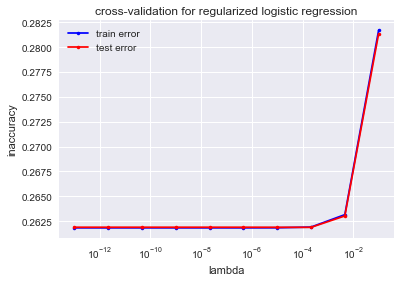

In [25]:
lambdas = np.logspace(-13,-1,10)
y_scaled = (y+1)/2.0
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_scaled, x, 10, reg_logistic_regression, accuracy, {'lambda_': lambda_,'initial_w': np.zeros(x.shape[1] + 1), 'max_iters': 10000, 'gamma': 0.0081491274690207397}, {'is_sigmoid': True})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te, "lambda", "inaccuracy", "cross-validation for regularized logistic regression", "cross_validation_reg_logistic_regression.png")